<h1><center><font size="9">Data1030 Preprocessing & EDA</font></center></h1>

<h1><center><font size="7">Airbnb in New York</font></center></h1>
<h1><center><font size="6">Yuyang Li</font></center></h1>

<font size="6">1. Project Task</font>

The goal of this project is to build different machine learning models to predict the prices of Airbnb in New York, given the datasets from Kaggle. See https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3#AB_NYC_2019.csv. The target variable is the prices of Airbnb in New York and the problem is regression. It is pretty interesting because nowadays more people use airbnb to expand on traveling possibilities. Staying in airbnb gives people more personalized experiences.

<center>
    <div class="row">
    <img src="airbnb-newyork.png" style="height: 300px;">
    </div>
</center>

<font size="6">2. Related Work</font> 

From Kaggle Kernels, I have gone through some of projects completed by other people. In Dgomonov's "Data Exploration on NYC Airbnb", he uses the data for security, business decisions and guiding marketing initiatives, etc. Features such as id, host_name and last_review are dropped since these features are not significant for future predictions. I get some ideas of how to implement exploratory data analysis and feature engineering for the dataset. In Andrew W's "Smart Pricing with XGB, RFR + Interpretations", he uses the data to build and train a smart pricing model. The target variable is price. The price is initially transformed through log-transformation. I learn some feasible regression models.

<font size="6">3. Dataset and Metric</font> 

The dataset and a map of New York city are provided by Kaggle. Originally, there are in total 16 features and 48895 rows in the dataset 'AB_NYC_2019.csv'.

In [8]:
import pandas as pd
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
print("Total number of rows:", df.shape[0])
print("Total number of features:",df.shape[1])

Total number of rows: 48895
Total number of features: 16


<font size="5">3.1 Missing Values</font> 

In [10]:
import numpy as np
df.replace(to_replace=' ?',value = np.nan, inplace=True)
res = df.isnull().sum(axis=0)/df.shape[0]
print(res)

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64


From above, name, host_name, last_review and reviews_per_month are the four features which have missing values.

| Feature | Percentage |
| ------- | ---------- |
| name | 0.000327 |
| host_name | 0.000429 |
| last_review | 0.205583 |
| reviews_per_month | 0.205583 |

For reviews_per_month, I will replace the missing values by 0, because by intuition, if there is no reviews per month, it means that the reviews per month is 0. And same for last_review, because by intuition, if there is no last review, it means that the date for last review does not exist. So I will replace the missing values by 0 as well. And for name and host_name, I will firstly perform NLP technique and Race & Ethnicity technique separately to generate new feature columns. After generating new feature columns, I will drop the original features name and host_name, and use the new feature columns instead.

In [11]:
df.fillna({'reviews_per_month':0}, inplace = True)
df.fillna({'last_review':0}, inplace = True)

<font size="5">3.2 Dropping Features</font> 

Features id and host_id are dropped. For id, it represents listing id which is meaningless. For host_id, it is meaningful because one host could have more than one listing. However, calculated_host_listings_count represents the amount of listing per host. Since there is calculated_host_listings_count in the features, I will drop host_id.

In [13]:
host=df['host_id'].value_counts().head(10)
host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [14]:
host_confirm = df['calculated_host_listings_count'].max()
host_confirm

327

By comparing above two results, I confirm that calculated_host_listings_count is the same as the most listings host_id can have.

In [15]:
df = df.drop(['id'],axis=1)
df = df.drop(['host_id'],axis=1)
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<font size="5">3.3 NLP Technique</font> 

For name, I will use NLP technique to find out the top most frequent word.

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

# get copy of df
df_copy = df.copy()

# assemble all the rows from name
all_name = df_copy['name'].str.cat(sep=',')

# transform all_name into tokenized_word
text = all_name
tokenized_word = word_tokenize(text)

# generate a set of all non-important words
stop_words = set(stopwords.words("english"))

# delete all non-important words
filtered_sent = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

# reduce words to word root
ps=PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
# get top 10 most common words
fdist = FreqDist(stemmed_words)
topmostcommonwords = fdist.most_common(10)
df_commonwords = pd.DataFrame(topmostcommonwords, columns=['word','count'])
df_commonwords

,word,count
0,",",55567
1,room,10096
2,!,7855
3,bedroom,7787
4,privat,7166
5,apart,6480
6,cozi,5021
7,apt,4323
8,brooklyn,4010
9,studio,3943


I decide to use bedroom, privat, apart and brooklyn, because ',' 'room' '!' 'apt' do not make too much sense. Room is too vague, apt is probably the same as apart and it is less frequent than apart, cozi is somewhat vague as well.

| Feature |
| ------- |
| bedroom |
| privat |
| apart |
| brooklyn |

Replace the missing value in feature name with "NA. In the next step, if row of feature name has at least one of the four words above, I will classify it to 'positive'. Otherwise, classify it to 'negative'. So replacing with "NA" simply means it will be classified as 'negative'.

In [16]:
df.fillna({'name':"NA"}, inplace = True)

In [ ]:
for i in range(len(df['name'])):
    featurelist = ['bedroom', 'privat', 'apart', 'brooklyn']
    df_name_new = df['name'][i].split(" ")
    for j in range(len(df_name_new)):
        df_name_new[j] = df_name_new[j].lower()
        for item in featurelist:
            if item in df_name_new:
                df['name'][i] = 'positive'
                break
            else:
                df['name'][i] = 'negative'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<font size="5">3.4 Race and Ethnicity </font> 

For the host_name, I will try to classify the name of the host based on the race and ethnicity from name.

In [58]:
# tensorflow is not allowed on python 3.7 package ethnicolr
#pandas==0.19.2
#h5py==2.7.0
#Keras==2.2.0
#numpy==1.14.5
#tensorflow==1.12.3

In [59]:
# replace the missing value with " "
df.fillna({'host_name':" "}, inplace = True)

In [70]:
import pandas as pd
from ethnicolr import census_ln, pred_census_ln
df_copy = df.copy()
names = df_copy['host_name']
df_host_name = pd.DataFrame(names, columns=['host_name'])
output = pred_census_ln(df_host_name, 'host_name')
columns = ['host_name','race']
X = output[columns]
df_race = pd.DataFrame(X, columns=columns)
df_race.head()

,host_name,race
0,John,white
1,Jennifer,white
2,Elisabeth,white
3,LisaRoxanne,white
4,Laura,white


In [63]:
#df_race["ethnicity"] = ""
# df_race["api"] = ""
# df_race["white"] = ""
# df_race["black"] = ""

In [64]:

# for i in range(len(df_race)):
#     if df_race['race'][i]=='white':
#         df_race['hispanic'].iloc[i] = 'white'
# #     else:
# #         df_race['hispanic'].iloc[i] = 0


In [65]:

# for i in range(len(df_race)):
#     if df_race['race'][i]=='api':
#         df_race['api'].iloc[i] = 'api'
# #     else:
# #         df_race['api'].iloc[i] = 0

In [66]:

# for i in range(len(df_race)):
#     if df_race['race'][i]=='white':
#         df_race['white'].iloc[i] = 'white'
# #     else:
# #         df_race['white'].iloc[i] = 0

In [67]:

# for i in range(len(df_race)):
#     if df_race['race'][i]=='black':
#         df_race['black'].iloc[i] = 'black'
# #     else:
# #         df_race['black'].iloc[i] = 0

In [85]:
df_result = pd.concat([df, df_race], axis=1)
#df_result[10:30]

In [86]:
columns = ['host_name']
df_result.drop(columns, inplace=True, axis=1)
#df_result[10:30]

<font size="5">3.5 last_review </font> 

In [87]:
standard = pd.Timestamp('2019-07-09').timestamp()
standard_day = int(standard)
timelist = []
#print(standard_day)
for i in range(len(df['last_review'])):
    outputresult = pd.Timestamp(df['last_review'][i]).timestamp()
    all_days = int(outputresult)
    diff  = (standard_day - all_days) / 86400
    diff_days = int(diff)
    #print(diff_days)
    timelist.append(diff_days)
    #print(timelist)
    df_time=pd.DataFrame(timelist, columns=['time'])

In [35]:
# 18086 represents number of days between 2019-07-09 and '0', so I need to replace them back to 0 which represents
# missing value

In [88]:
for i in range(len(df_time['time'])):
    if df_time['time'][i]==18086:
        df_time['time'].iloc[i] = 0

In [1]:
df_finalresult = pd.concat([df_result, df_time], axis=1)
#df_finalresult.head()

NameError: name 'pd' is not defined

In [2]:
columns = ['last_review']
df_finalresult.drop(columns, inplace=True, axis=1)
#df_finalresult.head()
df_finalresult.to_csv("preprocessed_for_grid.csv", index = False)
df_finalresult.head()

NameError: name 'df_finalresult' is not defined

Overall, the dataset is pretty well-documented. The following is a detailed description of each feature finally.

| Feature | Description (Unit) | Type |
| ------- | ------ ---- | ---- |
| name | positive if at least one of four frequent words is in name, negative otherwise | categorical |
| neighbourhood_group | location | categorical |
| neighbourhood | area | categorical |
| latitude | latitude coordinate | numerical |
| longitude | longitude coordinate | numerical |
| room_type | listing space type | categorical |
| price | price in dollar (dollar) | numerical |
| minimum_nights | amount of nights minimum (# nights) | numerical |
| number_of_reviews | number of reviews (# reviews) | numerical |
| reviews_per_month | number of reviews per month | numerical |
| calculated_host_listings_count | amount of listing per host | numerical |
| availability_365 | number of days when listing is available for booking (# days yearly) | numerical |
| race | ethnicity | categorical |
| time | time difference between each date and standard date (2019-07-09) | numerical |

<font size="6">4. Data Preprocessing</font> 

<font size="5">4.1 OneHotEncoder </font> 

For neighbourhood_group, neighbourhood, I will apply OneHotEncoder because these features are categorical and they could not be ordered. 

In [116]:
from sklearn.preprocessing import OneHotEncoder
columns=['neighbourhood_group','neighbourhood','room_type','name','race']
X_train=df_finalresult[columns].copy()
enc=OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(X_train)
columns=enc.get_feature_names(columns)
X_train = enc.transform(X_train)
df_1=pd.DataFrame(X_train, columns=columns)
#df_1.to_csv('OneHotEncoder.csv',index=False)
df_1.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,name_negative,name_positive,race_api,race_black,race_hispanic,race_white
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


continuous features: latitude longi price min number_reviews reviews_month calculated avail time

<font size="5">4.2 MinMaxScaler </font> 

I decide to use MinMaxScaler for the feature availability_365, because it is clearly a bounded feature as the values can only be between 0 and 365. And I decide to use MinMaxScaler for the feature latitude and longitude, because the dataset is about airbnb in New York, so the longitude and latitude are bounded within New York.

In [117]:
from sklearn.preprocessing import MinMaxScaler
columns=['availability_365','latitude','longitude']
X_train = df_finalresult[columns].copy()
scaler = MinMaxScaler()
df_2=pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
#df_3.to_csv('MinMaxScaler.csv',index=False)
df_2.head()

,availability_365,latitude,longitude
0,1.000000,0.357393,0.511921
1,0.972603,0.614199,0.490469
2,1.000000,0.748252,0.569257
3,0.531507,0.448496,0.535649
4,0.000000,0.722820,0.565324


<font size="5">4.3 StandardScaler </font> 

And for minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count and time, I will use StandardScaler.

In [118]:
from sklearn.preprocessing import StandardScaler
columns=['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','time']
X_train = df_finalresult[columns].copy()
scaler = StandardScaler()
df_3=pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
#df_2.to_csv('StandardScaler.csv',index=False)
df_3.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,time
0,-0.293996,-0.320414,-0.551511,-0.034716,0.109459
1,-0.293996,0.487665,-0.445079,-0.156104,-0.445466
2,-0.196484,-0.522433,-0.682986,-0.186451,-0.572528
3,-0.293996,5.538156,2.221978,-0.186451,-0.562155
4,0.144807,-0.320414,-0.620379,-0.186451,0.029072


<font size="5">4.4 OrdinalEncoder </font> 

For room_type, I will use OrdinalEncoder.

In [119]:
# import pandas as pd
# from sklearn.preprocessing import OrdinalEncoder
# columns=['room_type']
# X_train = df_finalresult[columns].copy()
# cats = ['Shared room', 'Private room', 'Entire home/apt']
# enc = OrdinalEncoder(categories = [cats])
# enc.fit(X_train)
# X_train = enc.transform(X_train)
# df_4=pd.DataFrame(X_train, columns=columns)
# df_4.head()

<font size="5">4.5 Target Variable </font> 

For the target variable price, I decide to use it directly without any preprocessing, since it is continuous variable.

<font size="5">4.6 Raw Dataset </font> 

In [120]:
df_assemble = pd.concat([df_1, df_2, df_3, df_finalresult['price']], axis=1)
df_assemble.to_csv("preprocessed_data.csv", index = False)
df_assemble.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,race_white,availability_365,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,time,price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,0.357393,0.511921,-0.293996,-0.320414,-0.551511,-0.034716,0.109459,149
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.972603,0.614199,0.490469,-0.293996,0.487665,-0.445079,-0.156104,-0.445466,225
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,0.748252,0.569257,-0.196484,-0.522433,-0.682986,-0.186451,-0.572528,150
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.531507,0.448496,0.535649,-0.293996,5.538156,2.221978,-0.186451,-0.562155,89
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,0.722820,0.565324,0.144807,-0.320414,-0.620379,-0.186451,0.029072,80


In [109]:
print('number of rows:', df_assemble.shape[0])

number of rows: 48895


In [110]:
print('number of features after preprocessing:', df_assemble.shape[1])

number of features after preprocessing: 244


<font size="6">5. Data Visualization</font> 

<font size="5">5.1 WordCloud Graph</font> 

The graph below shows the tag cloud which represents how popular certain words are.

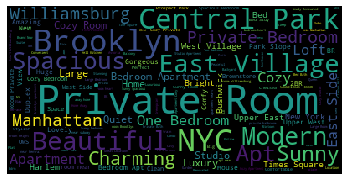

In [219]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = all_name
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png',dpi=100)
plt.show()

<font size="5">5.2 Spatial Graph </font>

Since the target variable is price, it would be interesting to explore the distribution of price shown as spatial graph. I choose to set up price boundary to be the mean of price.

In [220]:
print("The max of longitude:",df['longitude'].max())
print("The min of longitude:",df['longitude'].min())
print("The max of latitude:",df['latitude'].max())
print("The min of latitude:",df['latitude'].min())

The max of longitude: -73.71299
The min of longitude: -74.24441999999999
The max of latitude: 40.913059999999994
The min of latitude: 40.499790000000004


In [221]:
print("Proportion of airbnbs that their prices are lower than 300:",(df['price']<300).sum()/df.shape[0])

Proportion of airbnbs that their prices are lower than 300: 0.919869107270682


Since the proportion is over 90%, it is valid to use price=300 as the boundary value. It could represent most of the airbnbs in New York,.

In [222]:
scatter_price= df[df['price']<300]

In [240]:
# add new york map

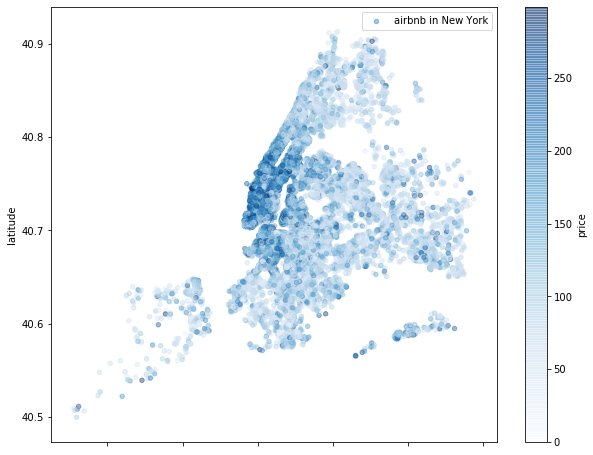

In [239]:
scatter = scatter_price.plot(kind='scatter', x='longitude', y='latitude', label='airbnb in New York', 
                                         c='price', cmap='Blues', alpha=0.4, figsize=(10,8))
scatter.legend()
plt.savefig('spatialgraph.png',dpi=100)

Manhattan has relatively more expensive apartments, while Staten Island has fewer expensive apartments.

<font size="5">5.3 Histogram </font>

It would be useful to explore the relationship between the number of different types of room and price.

In [14]:
df[df['price']<500].count()

name                              47644
host_name                         47639
neighbourhood_group               47660
neighbourhood                     47660
latitude                          47660
longitude                         47660
room_type                         47660
price                             47660
minimum_nights                    47660
number_of_reviews                 47660
last_review                       47660
reviews_per_month                 47660
calculated_host_listings_count    47660
availability_365                  47660
dtype: int64

In [15]:
# Since 47660/48895>97%, the boundary chosen could represent the relationship mostly.

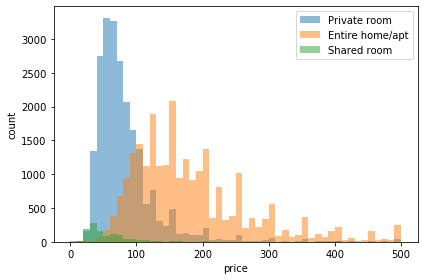

In [13]:
categories = df['room_type'].unique()
# I choose the boundary of price to be between 0 and 500
bin_range = (0,500)

for c in categories:
    plt.hist(df[df['room_type']==c]['price'],alpha=0.5,label=c,range=bin_range,bins=50)
plt.legend()
plt.ylabel('count')
plt.xlabel('price')
plt.tight_layout()
plt.savefig('histogram.png',dpi=100)
plt.show()

<font size="5">5.5 Heatmap </font>

It is interesting to plot a heatmap to show airbnbs who have top 200 reviews_per_month.

In [227]:
import pandas as pd
df_copy = pd.read_csv('AB_NYC_2019.csv')

In [228]:
df_top200_reviews_per_month=df_copy.sort_values(by=['reviews_per_month'],ascending=False).head(200)
#df_top200_reviews_per_month.head()

In [229]:
print("The average of longitude:",(df['longitude'].max()+df['longitude'].min())/2)
print("The average of latitude:",(df['latitude'].max()+df['latitude'].min())/2)
df_avg_longitude = (df['longitude'].max()+df['longitude'].min())/2
df_avg_latitude = (df['latitude'].max()+df['latitude'].min())/2

The average of longitude: -73.97870499999999
The average of latitude: 40.706424999999996


In [234]:
def generateBaseMap(default_location=[df_avg_latitude,df_avg_longitude], default_zoom_start=12):
    heatmap = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return heatmap
heatmap=generateBaseMap()

In [235]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

df_top200_reviews_per_month_map=plugins.MarkerCluster().add_to(heatmap)

for latitude_var,longitude_var,name in zip(df_top200_reviews_per_month['latitude'],df_top200_reviews_per_month['longitude'],
                                          df_top200_reviews_per_month['name']):
    folium.Marker(location=[latitude_var,longitude_var],icon=folium.Icon(icon='home'), popup=name).add_to(df_top200_reviews_per_month_map)
heatmap.add_child(df_top200_reviews_per_month_map)
heatmap
#plt.savefig('heatmap.png',dpi=100)